In [127]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from matplotlib import pyplot as  plt
%matplotlib inline

In [128]:
iris_dataset = load_iris()

iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [129]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [130]:
print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [131]:
print(iris_dataset.feature_names,'\n', iris_dataset.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 
 ['setosa' 'versicolor' 'virginica']


In [132]:


X_train, X_test,  y_train,y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], test_size=0.20, random_state=42)


In [133]:
X_train_df = pd.DataFrame(data=X_train, columns=iris_dataset.feature_names)
X_train_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,120.000000,120.000000,120.000000,120.000000
mean,5.809167,3.061667,3.726667,1.183333
std,0.823805,0.449123,1.752345,0.752289
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.750000,3.000000,4.250000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.700000,4.400000,6.700000,2.500000


In [134]:
X_train_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,4.6,3.6,1.0,0.2
1,5.7,4.4,1.5,0.4
2,6.7,3.1,4.4,1.4
3,4.8,3.4,1.6,0.2
4,4.4,3.2,1.3,0.2


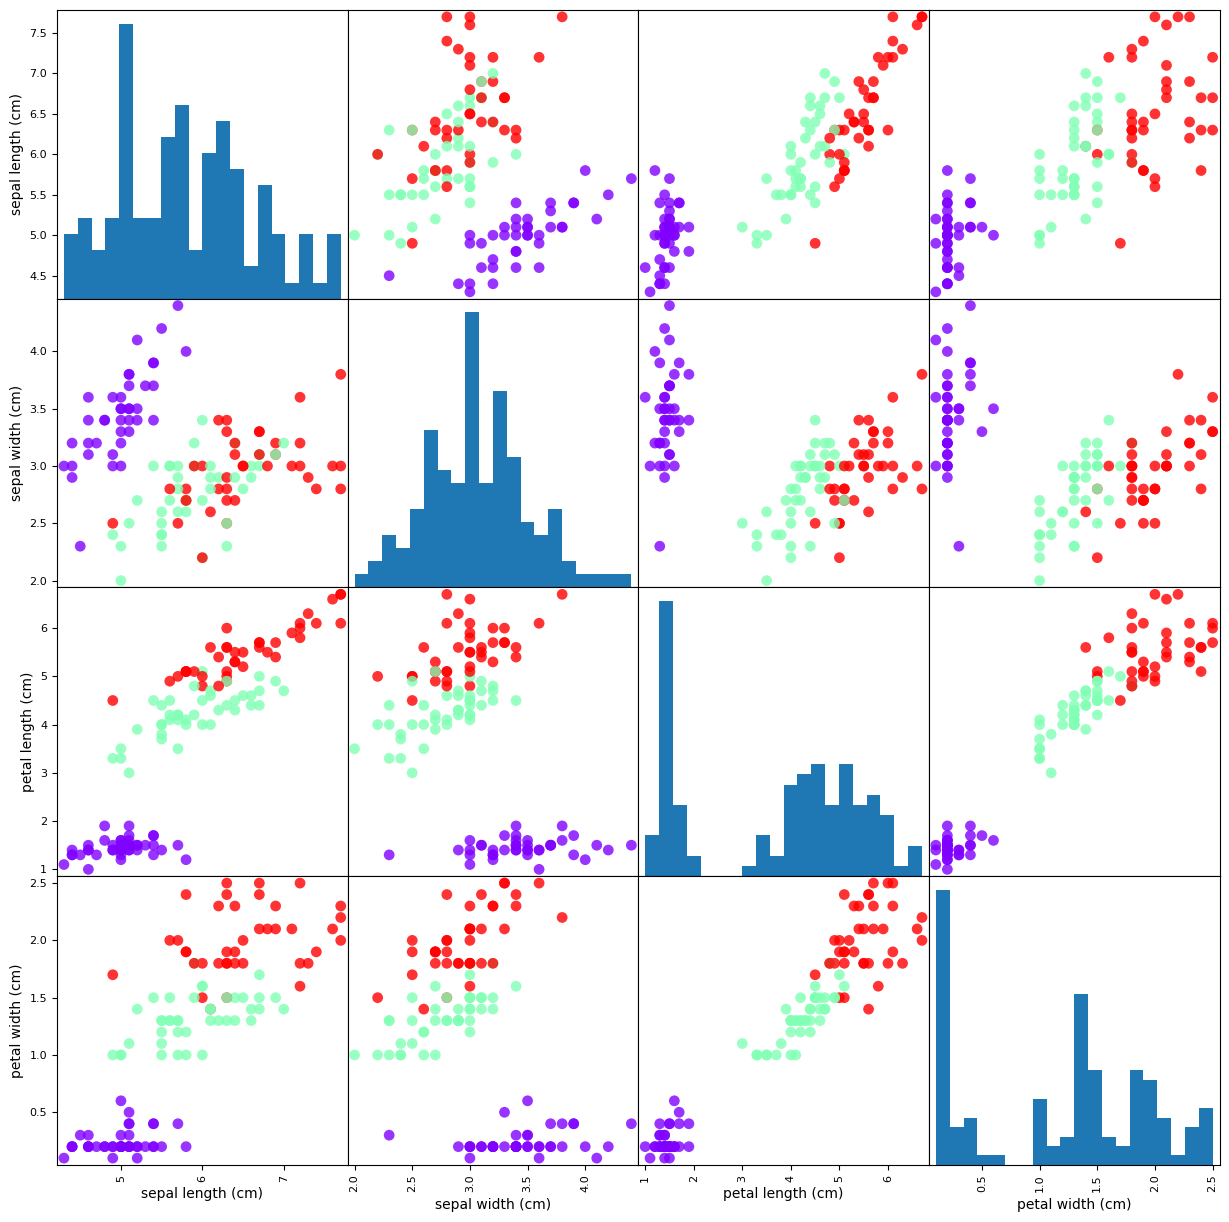

In [135]:
grr = scatter_matrix(X_train_df, c=y_train, marker="o", s=60, figsize=(15,15), cmap='rainbow', hist_kwds={'bins': 20}, alpha=0.8)

In [136]:

from functools import partial
def set_score(k:int, weights_type:str='uniform'):
    knn = KNeighborsClassifier(n_neighbors=k, weights=weights_type, metric="minkowski", p=2, leaf_size=30)
    knn.fit(X=X_train, y=y_train)
    y_predict = knn.predict(X_test)
    return metrics.accuracy_score(y_true=y_test, y_pred=y_predict)
set_score_distance = partial(set_score, weights_type='distance') 

In [137]:
k_values = range(1,11)

scores_dic_uniform = {k:score for k, score in zip(k_values, map(set_score, k_values))}
scores_dic_distance = {k:score for k, score in zip(k_values, map(set_score_distance, k_values))}

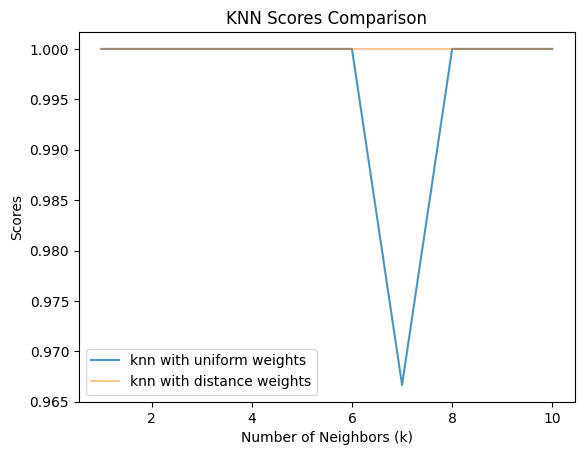

In [138]:

fig, ax = plt.subplots()


ax.plot(k_values, scores_dic_uniform.values(), label='knn with uniform weights', alpha=0.8)
ax.plot(k_values, scores_dic_distance.values(), label='knn with distance weights', alpha=0.45)


ax.set_xlabel('Number of Neighbors (k)')
ax.set_ylabel('Scores')
ax.set_title('KNN Scores Comparison')
ax.legend()

# Display the plot
plt.show()

In [139]:
from typing import List


def get_names(ls: List[int]) -> List[str]:
    return list(map(lambda t: iris_dataset['target_names'][t], ls))

In [149]:


knn = KNeighborsClassifier(3)

knn.fit(X_train, y_train)

y_predictions = knn.predict(X_test)

y_hat = get_names(y_predictions)
y_real = get_names(y_test)
y_hat

['versicolor',
 'setosa',
 'virginica',
 'versicolor',
 'versicolor',
 'setosa',
 'versicolor',
 'virginica',
 'versicolor',
 'versicolor',
 'virginica',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'versicolor',
 'virginica',
 'versicolor',
 'versicolor',
 'virginica',
 'setosa',
 'virginica',
 'setosa',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'setosa',
 'setosa']